**Hierarchical Clustering**


a) Implement hierarchical agglomerative clustering for this dataset. Your implementation should pro-
vide the option to use single (minimum) linkage, complete (maximum) linkage and average (mean)
linkage.


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt

In [23]:
# Find cartesian Distance between the data points
def  cartesian_distance(r1,r2):
  distance=0.0
  for i in range(len(r1)):
    #print(r1[i],r2[i])
    distance+=(r1[i]-r2[i])**2
  #print(sqrt(distance))
  return sqrt(distance)

#caliculate Distance Matrix
def get_distancematrix(training_data):
  distance=np.zeros((len(training_data),len(training_data)))
  for i in range(0,len(training_data)):
    for j in range(0,len(training_data)):
      distance[i][j]=cartesian_distance(training_data[i],training_data[j])
  return distance

In [24]:
training_data = pd.read_csv('Assignement1-2b.csv')
training_data=training_data.values
# distance=get_distancematrix(training_data[:,:3])
# print(distance[0])

In [25]:
# to find the clusters formed for each iteration
def get_clusters(distance_matrix,mode):
    clusters = {}
    row = -1
    column = -1
    indices = []
    for i in range(distance_matrix.shape[0]):
        indices.append(i)
    clusters[0] = indices.copy()
    for k in range(1, distance_matrix.shape[0]):
        min_val = np.inf
        for i in range(0, distance_matrix.shape[0]):
            for j in range(0, distance_matrix.shape[1]):
                if(distance_matrix[i][j]<=min_val):
                    min_val = distance_matrix[i][j]
                    row = i
                    column = j   
        # distance_matrix = np.tril(distance_matrix) 
        # ij_min = np.unravel_index(distance_matrix.argmin(), distance_matrix.shape) 
        # print(row,column)
        #mode is 0 then it is single  
        #update distance matrix by minimum distance
        if(mode == 0):
            for i in range(0,distance_matrix.shape[0]):
                if(i != column):
                    temp = min(distance_matrix[column][i],distance_matrix[row][i])
                    distance_matrix[column][i]  = temp
                    distance_matrix[i][column] = temp
        #mode is 1 then it is complete
        #update the distance matrix by maximum of distance
        elif(mode == 1):
             for i in range(0,distance_matrix.shape[0]):
                if(i != column and i!=row):
                    temp = max(distance_matrix[column][i],distance_matrix[row][i])
                    distance_matrix[column][i] = temp
                    distance_matrix[i][column] = temp
        #Linkage - Average if mode is 2
        #update the distance matrix by mean of distance
        elif(mode == 2):
             for i in range(0,distance_matrix.shape[0]):
                if(i != column and i!=row):
                    temp = (distance_matrix[column][i]+distance_matrix[row][i])/2
                    distance_matrix[column][i] = temp
                    distance_matrix[i][column] = temp
        for i in range (0,distance_matrix.shape[0]):
            distance_matrix[row][i] = np.inf
            distance_matrix[i][row] =np.inf
        minimum = min(row,column)
        maximum = max(row,column)
        for i in range(len(indices)):
            if(indices[i]==maximum):
                indices[i] = minimum
        clusters[k] = indices.copy()
    return clusters

In [26]:
#creating the cluster based on mode(linkage) and number of clusters
def agglomerative_clustering(training_data,nclusters,mode):  
    distances = get_distancematrix(training_data)
    np.fill_diagonal(distances,np.inf)
    clusters = get_clusters(distances,mode)     
    #cut off is the iteration at which the n clusters form
    cutoff = distances.shape[0] - nclusters
    #print(cutoff)
    clusters = clusters[cutoff]
    plot_clusters(training_data,clusters,mode)
    # print(np.unique(clusters))
    return clusters

In [27]:
#plotting the clusters
def plot_clusters(training_data,clusters,mode):  
    indices = []
    for x in np.nditer(np.unique(clusters)):
        indices.append(np.where(clusters==x))  
    fig = plt.figure(figsize=(10,6))
    linkage={0:'single',1:'Complete',2:'Average'}
    plot_title='Plotting clusters of '+linkage[mode]+' linkage; clusters is '+str(len(np.unique(clusters))) 
    fig.suptitle(plot_title)
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('Height')
    ax.set_ylabel('Weight')
    ax.set_zlabel('Age')
    point=0
    color=['red','orange','blue','brown','pink','green','violet','grey']
    for i in range(0,len(indices)):
        for j in np.nditer(indices[i]):
               ax.scatter(training_data[j,0],training_data[j,1],training_data[j,2], c=color[point])
        point = point + 1
    # plt.legend()
    plt.show()

In [28]:
#checking accuracy by counting more number of labels in the cluster and checking how much accuracately the cluster was derived 
def accuracycheck(training_data,cluster):
  k=0
  for i in np.unique(cluster):
    male_count=0
    female_count=0
    for j in range(len(training_data)):
      if(cluster[j]==i):
        if(training_data[j][-1]=='M'):
          male_count+=1
        else:
          female_count+=1
    if(male_count>female_count):
      print(f'Cluster {k}  has more M labels and accuracy is {(male_count/(female_count+male_count))*100} and size of cluster is {female_count+male_count}')
    else:
      print(f'Cluster {k}  has more W labels and accuracy is {(female_count/(female_count+male_count))*100} and size of cluster is {female_count+male_count}')
    k+=1


b) Apply your hierarchical clustering implementation with single (minimum) linkage to the data.
Choosing the case of 2, 4, 6, and 8 clusters, evaluate to what degree the clusters reflect the gen-
der distinctions in this data by evaluating the purity of the clusters using the original data labels.
For this, compute the accuracy for each cluster assuming that the predicted label for each cluster is
the most frequently occurring label in this cluster. Once you computed this for each cluster, com-
pute the overall accuracy using the corresponding number of clusters as the weighted sum of the
accuracies where the weight is the fraction of data points in the corresponding cluster.

--------------------------------------------single-----------------------------------------------------------------------


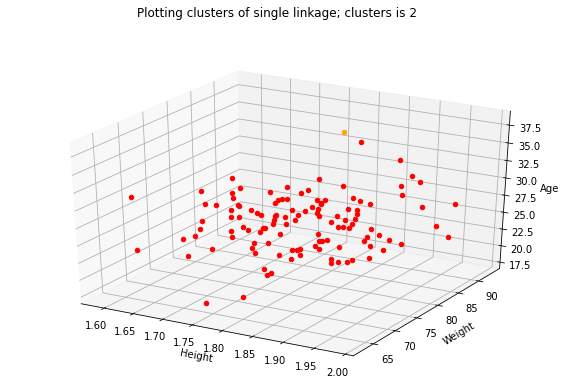

[ 0 12]
Cluster 0  has more W labels and accuracy is 56.30252100840336 and size of cluster is 119
Cluster 1  has more M labels and accuracy is 100.0 and size of cluster is 1


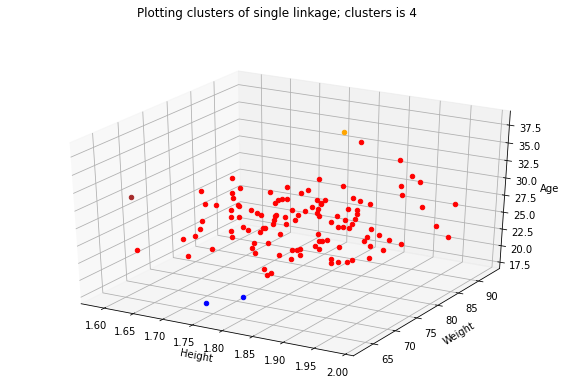

[  0  12  13 109]
Cluster 0  has more W labels and accuracy is 55.172413793103445 and size of cluster is 116
Cluster 1  has more M labels and accuracy is 100.0 and size of cluster is 1
Cluster 2  has more W labels and accuracy is 100.0 and size of cluster is 2
Cluster 3  has more W labels and accuracy is 100.0 and size of cluster is 1


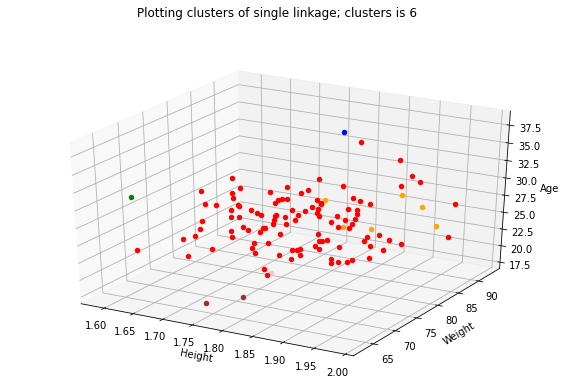

[  0   3  12  13  85 109]
Cluster 0  has more W labels and accuracy is 56.88073394495413 and size of cluster is 109
Cluster 1  has more M labels and accuracy is 83.33333333333334 and size of cluster is 6
Cluster 2  has more M labels and accuracy is 100.0 and size of cluster is 1
Cluster 3  has more W labels and accuracy is 100.0 and size of cluster is 2
Cluster 4  has more W labels and accuracy is 100.0 and size of cluster is 1
Cluster 5  has more W labels and accuracy is 100.0 and size of cluster is 1


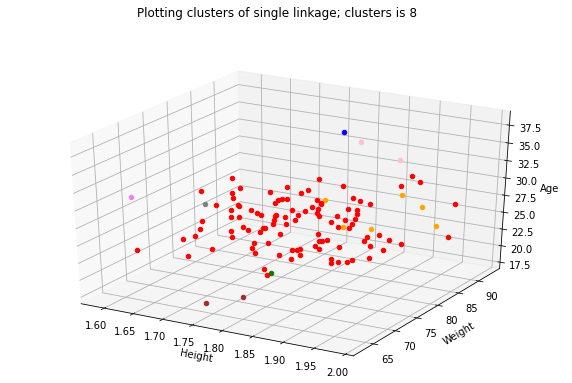

[  0   3  12  13  36  85 109 117]
Cluster 0  has more W labels and accuracy is 57.54716981132076 and size of cluster is 106
Cluster 1  has more M labels and accuracy is 83.33333333333334 and size of cluster is 6
Cluster 2  has more M labels and accuracy is 100.0 and size of cluster is 1
Cluster 3  has more W labels and accuracy is 100.0 and size of cluster is 2
Cluster 4  has more M labels and accuracy is 100.0 and size of cluster is 2
Cluster 5  has more W labels and accuracy is 100.0 and size of cluster is 1
Cluster 6  has more W labels and accuracy is 100.0 and size of cluster is 1
Cluster 7  has more W labels and accuracy is 100.0 and size of cluster is 1
**--------------------------------------------------------------------------------------------------------------------------------**
--------------------------------------------Complete-----------------------------------------------------------------------


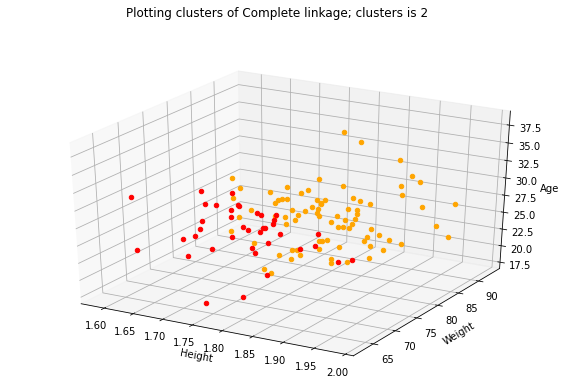

[0 1]
Cluster 0  has more W labels and accuracy is 74.35897435897436 and size of cluster is 39
Cluster 1  has more M labels and accuracy is 53.086419753086425 and size of cluster is 81


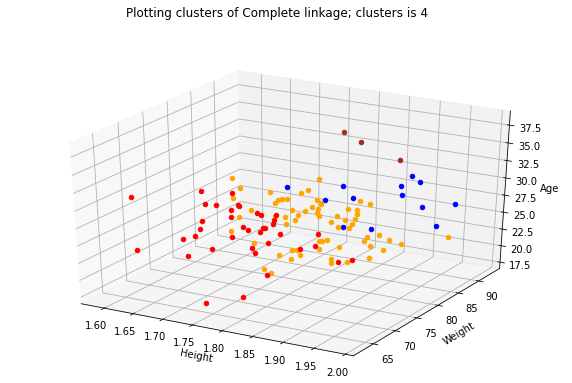

[ 0  1  3 12]
Cluster 0  has more W labels and accuracy is 74.35897435897436 and size of cluster is 39
Cluster 1  has more W labels and accuracy is 55.38461538461539 and size of cluster is 65
Cluster 2  has more M labels and accuracy is 84.61538461538461 and size of cluster is 13
Cluster 3  has more M labels and accuracy is 100.0 and size of cluster is 3


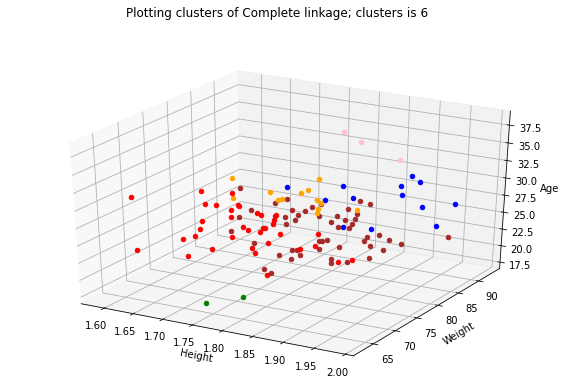

[ 0  1  3  5 12 13]
Cluster 0  has more W labels and accuracy is 72.97297297297297 and size of cluster is 37
Cluster 1  has more W labels and accuracy is 92.3076923076923 and size of cluster is 13
Cluster 2  has more M labels and accuracy is 84.61538461538461 and size of cluster is 13
Cluster 3  has more M labels and accuracy is 53.84615384615385 and size of cluster is 52
Cluster 4  has more M labels and accuracy is 100.0 and size of cluster is 3
Cluster 5  has more W labels and accuracy is 100.0 and size of cluster is 2


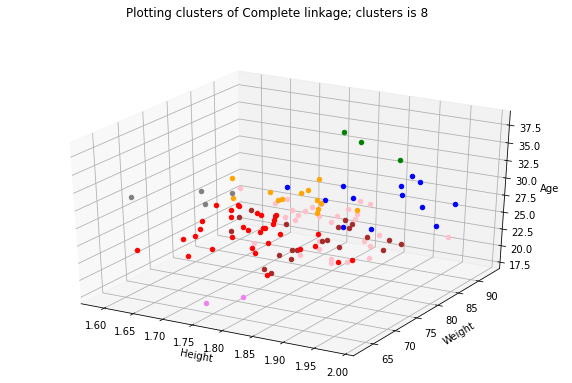

[ 0  1  3  5  8 12 13 28]
Cluster 0  has more W labels and accuracy is 69.6969696969697 and size of cluster is 33
Cluster 1  has more W labels and accuracy is 92.3076923076923 and size of cluster is 13
Cluster 2  has more M labels and accuracy is 84.61538461538461 and size of cluster is 13
Cluster 3  has more W labels and accuracy is 63.63636363636363 and size of cluster is 22
Cluster 4  has more M labels and accuracy is 66.66666666666666 and size of cluster is 30
Cluster 5  has more M labels and accuracy is 100.0 and size of cluster is 3
Cluster 6  has more W labels and accuracy is 100.0 and size of cluster is 2
Cluster 7  has more W labels and accuracy is 100.0 and size of cluster is 4
**--------------------------------------------------------------------------------------------------------------------------------**
--------------------------------------------Average-----------------------------------------------------------------------


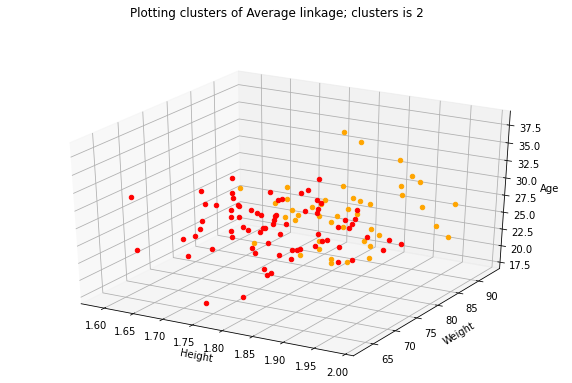

[0 3]
Cluster 0  has more W labels and accuracy is 73.68421052631578 and size of cluster is 76
Cluster 1  has more M labels and accuracy is 75.0 and size of cluster is 44


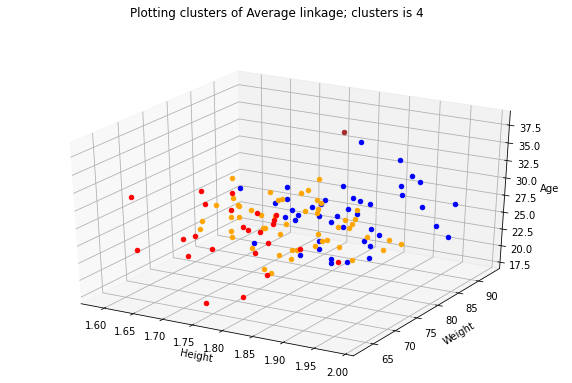

[ 0  1  3 12]
Cluster 0  has more W labels and accuracy is 87.5 and size of cluster is 24
Cluster 1  has more W labels and accuracy is 67.3076923076923 and size of cluster is 52
Cluster 2  has more M labels and accuracy is 74.4186046511628 and size of cluster is 43
Cluster 3  has more M labels and accuracy is 100.0 and size of cluster is 1


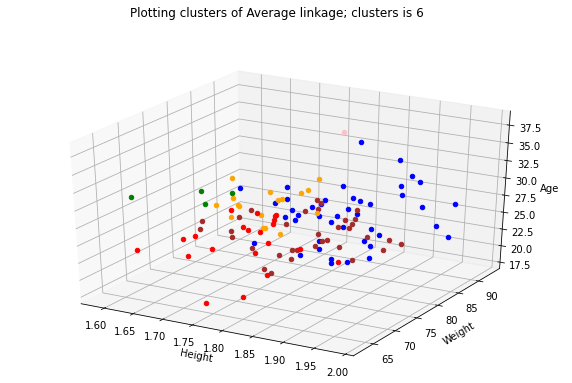

[ 0  1  3  5 12 28]
Cluster 0  has more W labels and accuracy is 85.0 and size of cluster is 20
Cluster 1  has more W labels and accuracy is 76.47058823529412 and size of cluster is 17
Cluster 2  has more M labels and accuracy is 74.4186046511628 and size of cluster is 43
Cluster 3  has more W labels and accuracy is 62.857142857142854 and size of cluster is 35
Cluster 4  has more M labels and accuracy is 100.0 and size of cluster is 1
Cluster 5  has more W labels and accuracy is 100.0 and size of cluster is 4


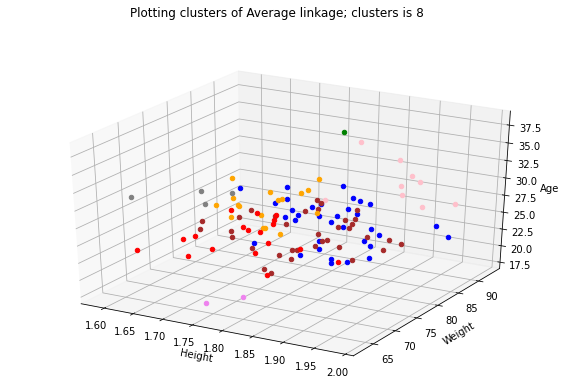

[ 0  1  3  5 11 12 13 28]
Cluster 0  has more W labels and accuracy is 83.33333333333334 and size of cluster is 18
Cluster 1  has more W labels and accuracy is 76.47058823529412 and size of cluster is 17
Cluster 2  has more M labels and accuracy is 70.58823529411765 and size of cluster is 34
Cluster 3  has more W labels and accuracy is 62.857142857142854 and size of cluster is 35
Cluster 4  has more M labels and accuracy is 88.88888888888889 and size of cluster is 9
Cluster 5  has more M labels and accuracy is 100.0 and size of cluster is 1
Cluster 6  has more W labels and accuracy is 100.0 and size of cluster is 2
Cluster 7  has more W labels and accuracy is 100.0 and size of cluster is 4
**--------------------------------------------------------------------------------------------------------------------------------**


In [29]:
modes=[0,1,2]
#0 is single , 1 is complete and 2 is average
linkage={0:'single',1:'Complete',2:'Average'}
for mode in modes:
  print(f'--------------------------------------------{linkage[mode]}-----------------------------------------------------------------------')
  for i in [2,4,6,8]:
    clusters=agglomerative_clustering(training_data[:,:3],i,mode) # data is trained without labels
    accuracycheck(training_data,clusters)
  print(f'**--------------------------------------------------------------------------------------------------------------------------------**')




c.  Repeat the clustering and evaluation from part 1b) using complete (maximum) linkage.

--------------------------------------------Complete-----------------------------------------------------------------------


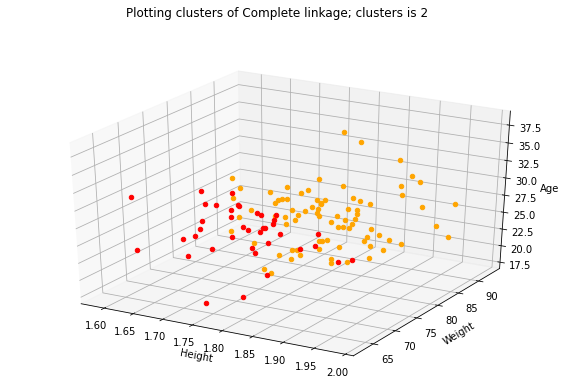

[0 1]
Cluster 0  has more W labels and accuracy is 74.35897435897436 and size of cluster is 39
Cluster 1  has more M labels and accuracy is 53.086419753086425 and size of cluster is 81


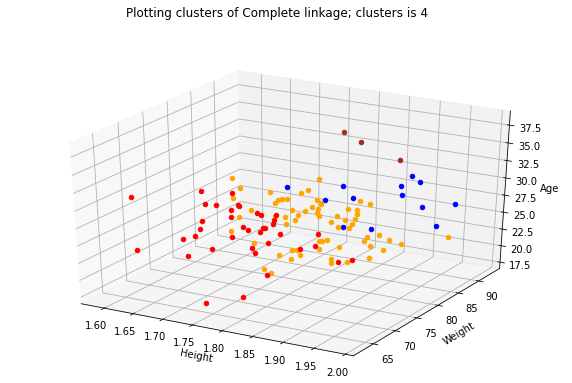

[ 0  1  3 12]
Cluster 0  has more W labels and accuracy is 74.35897435897436 and size of cluster is 39
Cluster 1  has more W labels and accuracy is 55.38461538461539 and size of cluster is 65
Cluster 2  has more M labels and accuracy is 84.61538461538461 and size of cluster is 13
Cluster 3  has more M labels and accuracy is 100.0 and size of cluster is 3


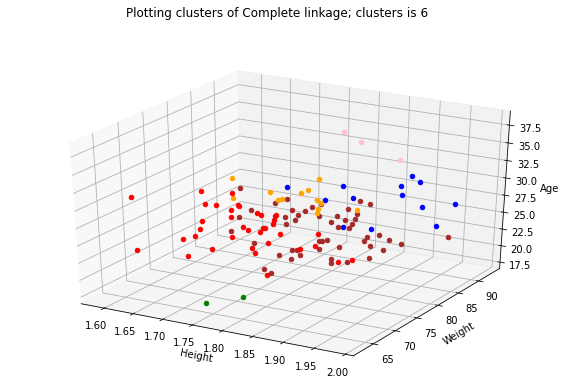

[ 0  1  3  5 12 13]
Cluster 0  has more W labels and accuracy is 72.97297297297297 and size of cluster is 37
Cluster 1  has more W labels and accuracy is 92.3076923076923 and size of cluster is 13
Cluster 2  has more M labels and accuracy is 84.61538461538461 and size of cluster is 13
Cluster 3  has more M labels and accuracy is 53.84615384615385 and size of cluster is 52
Cluster 4  has more M labels and accuracy is 100.0 and size of cluster is 3
Cluster 5  has more W labels and accuracy is 100.0 and size of cluster is 2


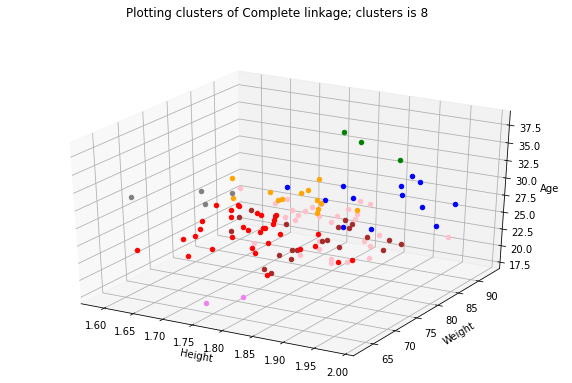

[ 0  1  3  5  8 12 13 28]
Cluster 0  has more W labels and accuracy is 69.6969696969697 and size of cluster is 33
Cluster 1  has more W labels and accuracy is 92.3076923076923 and size of cluster is 13
Cluster 2  has more M labels and accuracy is 84.61538461538461 and size of cluster is 13
Cluster 3  has more W labels and accuracy is 63.63636363636363 and size of cluster is 22
Cluster 4  has more M labels and accuracy is 66.66666666666666 and size of cluster is 30
Cluster 5  has more M labels and accuracy is 100.0 and size of cluster is 3
Cluster 6  has more W labels and accuracy is 100.0 and size of cluster is 2
Cluster 7  has more W labels and accuracy is 100.0 and size of cluster is 4
**--------------------------------------------------------------------------------------------------------------------------------**


In [30]:
mode=1
#0 is single , 1 is complete and 2 is average
linkage={0:'single',1:'Complete',2:'Average'}
print(f'--------------------------------------------{linkage[mode]}-----------------------------------------------------------------------')
for i in [2,4,6,8]:
  clusters=agglomerative_clustering(training_data[:,:3],i,mode) # data is trained without labels
  accuracycheck(training_data,clusters)
print(f'**--------------------------------------------------------------------------------------------------------------------------------**')


